<a href="https://colab.research.google.com/github/100jy/bigcon/blob/master/%EC%A7%80%EC%88%98_%EA%B0%9C%EB%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def set_font(size = 18):
  #한글폰트
  import matplotlib.font_manager as fm
  path = '/content/drive/My Drive/bigcon/NanumBarunGothic.ttf'
  fontprop = fm.FontProperties(fname=path, size=size)
  return fontprop

In [ ]:
# 소비형태의 온라인으로 전환
## 디지털 취약계층은 접근의 어려움
### 위험에도 불구하고 오프라인 거래를 하거나, 상대적으로 소비가 위축
#### 모두를 위한 접급성 높은 온라인 커머스 시스템 개발을 통해 격차를 해소
##### 소비 활성화 효과 극대화 -> 지역상인들이 수수료없이 플랫폼을 이용할 수 있게

# 소비형태의 온라인 전환
## 온라인 소비 지수

In [ ]:
##19년도와 20년도 카드소비(물건소비)대비 물동량으로 온라인 주문비율의 늘어남을 보여줌
# 온라인 결제비율 =  택배량/(물건카테고리)카드결제 건수 (일주일로 집계)
## 온라인 결제 비율의 증가를 보여줌....
logistics = pd.read_excel('/content/drive/My Drive/bigcon/2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx')

In [ ]:
logistics.head()

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21


In [ ]:
# 일자별로 집계, 모든지역 평균
logistics_19 = logistics.groupby(logistics['DL_YMD']).agg({'INVC_CONT' : np.sum})[:120]
logistics_20 = logistics.groupby(logistics['DL_YMD']).agg({'INVC_CONT' : np.sum})[120:-1]

In [ ]:
resident_card = pd.read_pickle('/content/drive/My Drive/bigcon/CARD_SPENDING_RESIDENT.pickle')

In [ ]:
name = np.array(pd.read_csv('/content/drive/My Drive/bigcon/name_list.txt')).flatten()
# 물질재에 대한 소비만 집계
item = [ '레저용품(20)','문화취미(22)', '가구(30)', 
       '주방용구(32)', '광학제품(34)', '가전(35)', '유통업(40)', '의복(42)',
       '직물(43)', '신변잡화(44)', '서적문구(50)', '사무통신(52)',
        '보건위생(71)', '음료식품(81)']
item = [x[-3:-1] + '_cnt' for x  in item]

resident_card_item = resident_card[item].groupby(resident_card['STD_DD']).sum()
resident_card_item = resident_card_item.reset_index()
#row sum
resident_card_item['total'] = resident_card_item.sum(axis = 1)

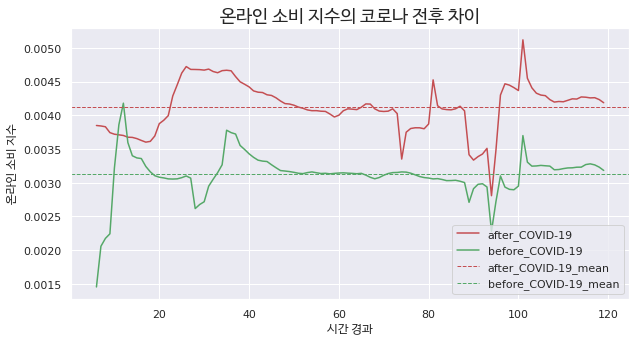

In [ ]:
#일주일의 간격 MA
resident_card_item_19 = resident_card_item['total'][:120].rolling(7).mean()
resident_card_item_20 = resident_card_item['total'][120:-1].rolling(7).mean()
# 온라인 결제지수 =  택배량/(물건카테고리)카드결제 건수 (일주일로 집계)
## 일주일 집계해줘야 계절요인 제거해서 편하게 볼 듯
online_19 =    logistics_19['INVC_CONT'].rolling(7).mean().values / resident_card_item_19
online_20 =   logistics_20['INVC_CONT'].rolling(7).mean().values / resident_card_item_20

import seaborn as sns
sns.set()
fig, axis = plt.subplots(figsize=(10,5))

index = [x for x in range(120)]
sns.lineplot(index,online_20,linewidth=1.5, color='r',label='after_COVID-19')
sns.lineplot(index,online_19,  linewidth=1.5, color='g',label='before_COVID-19')

axis.set_title('온라인 소비 지수의 코로나 전후 차이',fontsize=14, fontproperties=set_font(size = 18))
axis.set_ylabel('온라인 소비 지수',fontproperties=set_font(size = 12))
axis.set_xlabel('시간 경과',fontproperties=set_font(size = 12))
axis.axhline(y=online_20.mean(), color='r', linestyle='dashed', linewidth=1,label='after_COVID-19_mean')
axis.axhline(y=online_19.mean(), color='g',  linestyle='dashed',linewidth=1,label='before_COVID-19_mean')
axis.legend(loc = 'lower right')
#fig.savefig('./a.png', transparent=True)

물류데이터와 카드소비 데이터를 이용하여 온라인 소비지수를 개발한 뒤, 이를 이용하여 코로나이후 온라인을 통한 소비가 늘어난 것을 확인함. 

# 카테고리별 온라인 소비 전환률

In [ ]:
# 20년 온라인 소비 비중 / 19년 온라인 소비 비중
logistics_19 = logistics[logistics['DL_YMD']<200000].groupby([logistics['DL_GD_LCLS_NM']]).sum()[['INVC_CONT']]
logistics_20 = logistics[logistics['DL_YMD']>200000].groupby([logistics['DL_GD_LCLS_NM']]).sum()[['INVC_CONT']]
name_dict = {'가구/인테리어':30,'도서/음반':50, '디지털/가전':35,
 '생활건강':40, '스포츠/레저':20, '식품': 40,
 '출산/육아':40, '패션의류': 42, '패션잡화': 42,'화장품/미용': 71}
 # 온라인 소비비중 = 송장량 / 물질제 카드소비 건수


In [ ]:
resident_card

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,10_cnt,20_cnt,21_cnt,22_cnt,30_cnt,31_cnt,32_cnt,33_cnt,34_cnt,35_cnt,40_cnt,42_cnt,43_cnt,44_cnt,50_cnt,52_cnt,60_cnt,62_cnt,70_cnt,71_cnt,80_cnt,81_cnt,92_cnt,10_amt,20_amt,21_amt,22_amt,30_amt,31_amt,32_amt,33_amt,34_amt,35_amt,40_amt,42_amt,43_amt,44_amt,50_amt,52_amt,60_amt,62_amt,70_amt,71_amt,80_amt,81_amt,92_amt
0,20190201,대구 중구,동인동,10,F,25,11,595,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,595,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20190201,대구 중구,동인동,10,F,50,5,243,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,243,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20190201,대구 중구,동인동,10,F,55,5,27,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20190201,대구 중구,동인동,10,M,20,11,243,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,243,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20190201,대구 중구,동인동,10,M,25,11,433,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537748,20200531,서울 노원구,상계10동,81,M,45,19,127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,0
2537749,20200531,서울 노원구,상계10동,81,M,50,33,211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,211,0
2537750,20200531,서울 노원구,상계10동,81,M,55,9,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,0
2537751,20200531,서울 노원구,상계10동,81,M,60,19,194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,194,0


# 소비 위축 지수

In [ ]:
# 고령층에서 19년 대비 20년의 카드 매출이 더줄어들었다는 것을 보여준다.
resident_card = pd.read_pickle('/content/drive/My Drive/bigcon/CARD_SPENDING_RESIDENT.pickle')
#소비감소지수 =  20년 소비 총액/19년 소비 총액
older_19 = resident_card[resident_card['AGE_CD'] >= 65]
older_19 = older_19.groupby(resident_card['STD_DD']).sum()[['USE_AMT']][:120]
younger_19 = resident_card[resident_card['AGE_CD'] < 65]
younger_19 = younger_19.groupby(resident_card['STD_DD']).sum()[['USE_AMT']][:120]

older_20 = resident_card[resident_card['AGE_CD'] >= 65]
older_20 = older_20.groupby(resident_card['STD_DD']).sum()[['USE_AMT']][120:-1]
younger_20 = resident_card[resident_card['AGE_CD'] < 65]
younger_20 = younger_20.groupby(resident_card['STD_DD']).sum()[['USE_AMT']][120:-1]

In [ ]:
index = [x for x in range(120)]
younger_20.index,younger_19.index = index,index
older_20.index,older_19.index = index,index
younger_consume = younger_20/younger_19
older_consume = older_20/older_19

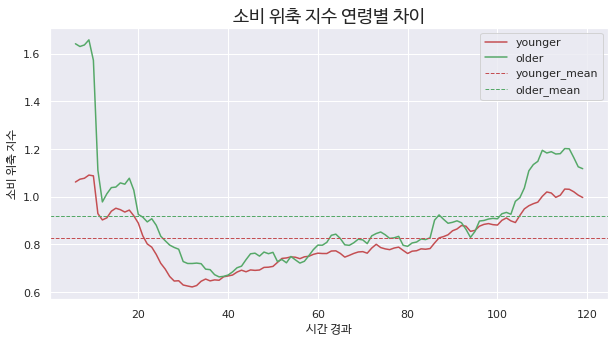

In [ ]:
import seaborn as sns
sns.set()
fig, axis = plt.subplots(figsize=(10,5))

index = [x for x in range(120)]
sns.lineplot(index,younger_consume['USE_AMT'].rolling(7).mean(),linewidth=1.5, color='r',label='younger')
sns.lineplot(index,older_consume['USE_AMT'].rolling(7).mean(),  linewidth=1.5, color='g',label='older')

axis.set_title('소비 위축 지수 연령별 차이',fontsize=14, fontproperties=set_font(size = 18))
axis.set_ylabel('소비 위축 지수',fontproperties=set_font(size = 12))
axis.set_xlabel('시간 경과',fontproperties=set_font(size = 12))
axis.axhline(y=younger_consume['USE_AMT'].mean(), color='r', linestyle='dashed', linewidth=1,label='younger_mean')
axis.axhline(y=older_consume['USE_AMT'].mean(), color='g',  linestyle='dashed',linewidth=1,label='older_mean')
axis.legend(loc = 'upper right')

젊은 층의 소비가 더 위축되었음....

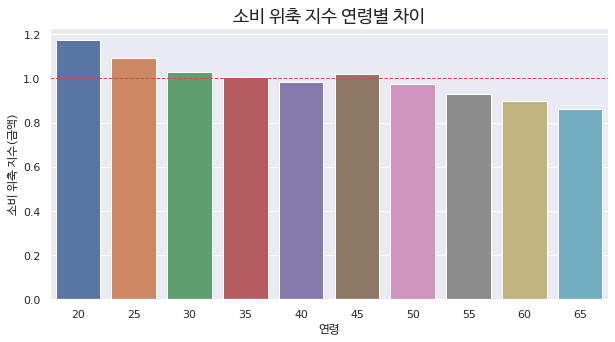

In [ ]:
#소비감소지수 =  20년 소비 총액/19년 소비 총액
card_by_age = resident_card.groupby([resident_card['STD_DD'],resident_card['AGE_CD']]).sum()[['USE_AMT']]
card_by_age_mean = resident_card.groupby(resident_card['AGE_CD']).mean()[['USE_AMT']]

resident_card_19 =  resident_card.groupby([resident_card['STD_DD'],resident_card['AGE_CD']]).sum()[:120]
resident_card_19 = resident_card_19.reset_index()
resident_card_19 = resident_card_19.groupby(resident_card_19['AGE_CD']).mean()[['USE_AMT']]
resident_card_20 =  resident_card.groupby([resident_card['STD_DD'],resident_card['AGE_CD']]).sum()[120:-1]
resident_card_20 = resident_card_20.reset_index()
resident_card_20 = resident_card_20.groupby(resident_card_20['AGE_CD']).mean()[['USE_AMT']]

dep_consume = resident_card_19/resident_card_20

dep_consume = dep_consume.reset_index()

sns.set()
fig, axis = plt.subplots(figsize=(10,5))
sns.barplot(data=dep_consume, x="AGE_CD", y="USE_AMT")
axis.set_title('소비 위축 지수 연령별 차이',fontsize=14, fontproperties=set_font(size = 18))
axis.set_ylabel('소비 위축 지수(금액)',fontproperties=set_font(size = 12))
axis.set_xlabel('연령',fontproperties=set_font(size = 12))
axis.axhline(y=1, color='r', linestyle='dashed', linewidth=1)

연령이 낮을 수록 소비위축지수가 더 크다. 고연령을 경우 오히려 전년 대비 소비금액이 더 늘었다.

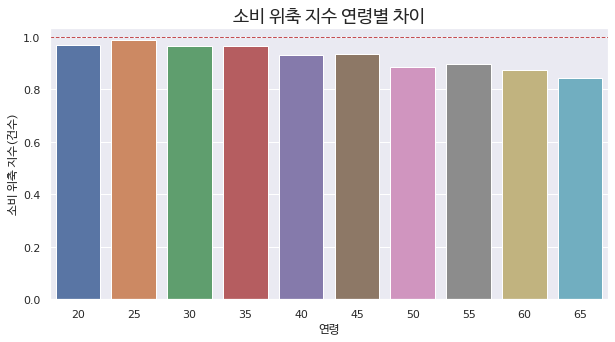

In [ ]:
#소비감소지수 =  20년 소비 총액/19년 소비 총액
card_by_age = resident_card.groupby([resident_card['STD_DD'],resident_card['AGE_CD']]).sum()[['USE_CNT']]
card_by_age_mean = resident_card.groupby(resident_card['AGE_CD']).mean()[['USE_CNT']]
resident_card_19 =  resident_card.groupby([resident_card['STD_DD'],resident_card['AGE_CD']]).sum()[:120]
resident_card_19 = resident_card_19.reset_index()
resident_card_19 = resident_card_19.groupby(resident_card_19['AGE_CD']).mean()[['USE_CNT']]
resident_card_20 =  resident_card.groupby([resident_card['STD_DD'],resident_card['AGE_CD']]).sum()[120:-1]
resident_card_20 = resident_card_20.reset_index()
resident_card_20 = resident_card_20.groupby(resident_card_20['AGE_CD']).mean()[['USE_CNT']]

dep_consume = resident_card_19/resident_card_20
dep_consume = dep_consume.reset_index()

sns.set()
fig, axis = plt.subplots(figsize=(10,5))
sns.barplot(data=dep_consume, x="AGE_CD", y="USE_CNT")
axis.set_title('소비 위축 지수 연령별 차이',fontsize=14, fontproperties=set_font(size = 18))
axis.set_ylabel('소비 위축 지수(건수)',fontproperties=set_font(size = 12))
axis.set_xlabel('연령',fontproperties=set_font(size = 12))
axis.axhline(y=1, color='r', linestyle='dashed', linewidth=1)

소비건수로 보았을 떄에는 전년대비 모든 연령대에서 소비가 위축되었다.

# 카테고리별 소비 위축지수

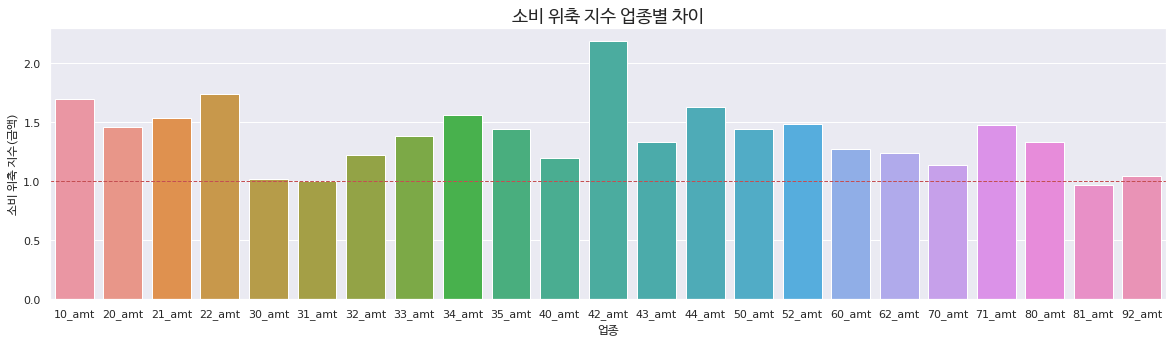

In [ ]:
card_by_cate = resident_card.groupby([resident_card['STD_DD']]).sum().reset_index()
card_by_cate = card_by_cate.iloc[:,28:]
index = [x for x in range(120)]
val_19 = card_by_cate[:120].rolling(7).mean()
val_20 = card_by_cate[120:-1].rolling(7).mean()
val_20.index = index

#19/20
val = val_19 / val_20
fig, axis = plt.subplots(figsize=(20,5))
sns.barplot(data=pd.DataFrame(val.mean()).reset_index(), x="index", y=0)
axis.set_title('소비 위축 지수 업종별 차이',fontsize=14, fontproperties=set_font(size = 18))
axis.set_ylabel('소비 위축 지수(금액)',fontproperties=set_font(size = 12))
axis.set_xlabel('업종',fontproperties=set_font(size = 12))
axis.axhline(y=1, color='r', linestyle='dashed', linewidth=1)

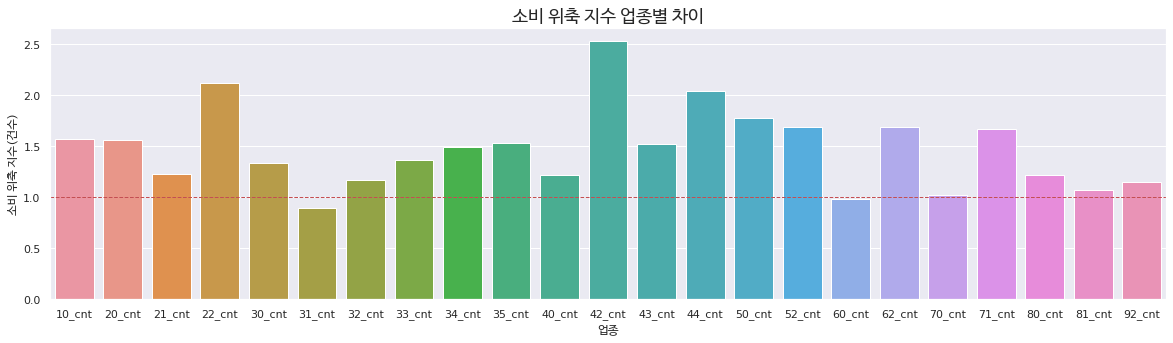

In [ ]:
card_by_cate = resident_card.groupby([resident_card['STD_DD']]).sum().reset_index()
card_by_cate = card_by_cate.iloc[:,5:28]
index = [x for x in range(120)]
val_19 = card_by_cate[:120].rolling(7).mean()
val_20 = card_by_cate[120:-1].rolling(7).mean()
val_20.index = index

#19/20
val = val_19 / val_20
fig, axis = plt.subplots(figsize=(20,5))
sns.barplot(data=pd.DataFrame(val.mean()).reset_index(), x="index", y=0)
axis.set_title('소비 위축 지수 업종별 차이',fontsize=14, fontproperties=set_font(size = 18))
axis.set_ylabel('소비 위축 지수(건수)',fontproperties=set_font(size = 12))
axis.set_xlabel('업종',fontproperties=set_font(size = 12))
axis.axhline(y=1, color='r', linestyle='dashed', linewidth=1)

대부분의 카테고리에서 평균적으로 금액도, 액수도 소비가 위축됨

# 업종별 소비위축지수와 온라인 소비 증가 지수 같이 본다면??
## 가설-1) 온라인 전환률이 큰 업종이 덜 위축됬을 것이다.
(물질재 서비스 업체 한정)

In [ ]:
name = np.array(pd.read_csv('/content/drive/My Drive/bigcon/name_list.txt')).flatten()
# 물질재에 대한 소비만 집계
item = [ '레저용품(20)','문화취미(22)', '가구(30)', 
       '주방용구(32)', '광학제품(34)', '가전(35)', '유통업(40)', '의복(42)',
       '직물(43)', '신변잡화(44)', '서적문구(50)', '사무통신(52)',
        '보건위생(71)', '음료식품(81)']
item = [x[-3:-1] + '_cnt' for x  in item]

resident_card_item = resident_card[item].groupby(resident_card['STD_DD']).sum()
resident_card_item = resident_card_item.reset_index()

# 다른 유용한 지수 뭐가 있을까???

In [ ]:
sns = pd.read_csv('/content/drive/My Drive/bigcon/2020 bigcontest data_wisenut.csv',sep='')
sns.head()
#코로나 언급시작점...
#지역별 혹은 달별 sns

#보류
---



# 노인들이 온라인 커머스를 이용하지 않는 이유

- 분석을 이용해서
- 해당 부분들을 개선한 시스템
- 결제 간소화, 노인 주거지역에 포스기를 설치, 생체정보로 결제

In [ ]:
# IOT장비 이용????